# 1 a) Read a RGB colour image (e.g. png) and display it.

-- For this I have used open cv, therefore imported cv2 for the same. For the purpose of plotting the image, we have used the library Matplotlib.  It gives an "object-oriented API" which embables plotting into applications with GUI toolkits.
-- The initial image that we read always reads a BRG file (get stored in this form), therefore we need to convert it to RGB.
-- I removed the numbered axis by simply calling: plt.axis("off").
-- Finally, I was able to achieve the desired result.

"Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html"

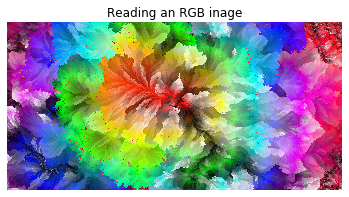

In [2]:
import cv2
from matplotlib import pyplot as plt
#Reading an image
img = cv2.imread('image_2.png')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#Ploting the image
plt.axis("off")
plt.title("Reading an RGB inage")
plt.imshow(hsv)
plt.show()

# 1 b) Convert the RGB image into Lab colour system and display each component (L,a,b) as an gray level image.

-- LAB component acts very differently from that of RGB component. The basic and the most important difference between the two is that in LAB we have a dedicated channel only for the brightnes that is L, whereas the other two that is A & B acts as color component ranging from Green to Magent while the other serves as color component ranging from Blue to Yellow. This is different from RBG as all the channels encode information on brightens.
L - lightness
    100 = White 
    50 = gray 
    0 = Black 
A – Cyan to magenta
    100 = Cyan
    0 = Neutral
    100 = Magenta
B – Blue to Yellow 
    -100 = Blue
    0 = Neutral 
    100 = yellow 

"Reference: https://stackoverflow.com/questions/21210479/converting-from-rgb-to-lab-colorspace-any-insight-into-the-range-of-lab-val , https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


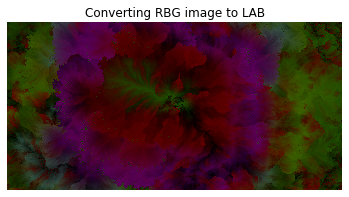

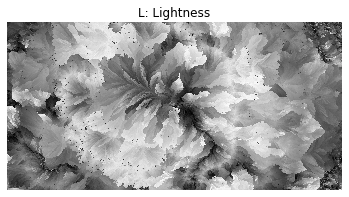

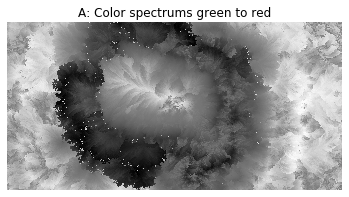

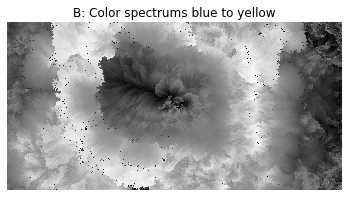

True

In [3]:
from skimage import io, color

# rgb2lab used for conversion
img = cv2.imread("image_2.png")
lab = color.rgb2lab(img)
#Plotting
plt.axis("off")
plt.title("Converting RBG image to LAB")
plt.imshow(lab/255)
plt.show()
#Displaying each component i.e. L, A, & B as gray level image
L,A,B = cv2.split(lab)
#Ploting the image
plt.axis("off")
plt.title("L: Lightness")
plt.imshow(L,cmap = 'gray')
plt.show()
plt.axis("off")
plt.title("A: Color spectrums green to red")
plt.imshow(A,cmap = 'gray')
plt.show()
plt.axis("off")
plt.title("B: Color spectrums blue to yellow")
plt.imshow(B,cmap = 'gray')
plt.show()
# Saving the L componenent
filename = 'L_component.png'
cv2.imwrite(filename, L)

# 1 c) Compute the spatial derivatives of the luminance component L in the horizontal and vertical direction using convolution by the derivatives of Gaussian filter. Display each these derivatives as grey level images.

-- Gaussian filters reduces the "rise and fall time". It is due to the fact that this filter have the least possible delay. It is said to be the ideal "frequency domain filter". 
-- The function includes "convolution" of filter between the "kernal" and  "image". 
-- The change in intensity is reflected by the gradient points. 

"References: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html, https://scipy.github.io/devdocs/tutorial/ndimage.html"

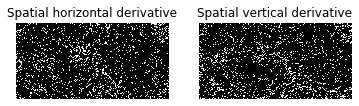

In [4]:
import scipy 
img = cv2.imread('L_component.png',0)
s = 1
w = 5
t = (((w - 1)/2)-0.5)/s
#Applying Gaussian filter  
horizontal_direction = scipy.ndimage.filters.gaussian_filter1d(img, sigma = s, axis = 1, order = 1, truncate = t)
vertical_direction = scipy.ndimage.filters.gaussian_filter1d(img, sigma = s, axis = 0, order = 1, truncate = t)
#Ploting both the images
pict = plt.figure()
pict.add_subplot(1, 2, 1)
plt.axis("off")
plt.title("Spatial horizontal derivative")
plt.imshow(horizontal_direction, cmap = 'gray')
pict.add_subplot(1, 2, 2)
plt.axis("off")
plt.title("Spatial vertical derivative")
plt.imshow(vertical_direction, cmap = 'gray')

# 1d). Compute a 2D histogram with the chrominance component (a,b) and display the histogram as a grey image (heat map) and/or as a 3D surface (bar plot).

-- An image histogram is a "graphical representation" of the no. of pixels in an image as its intensity.
-- Histograms are made up of bins, each bin representing a certain intensity value range. The histogram is computed by examining all pixels in the image and assigning each to a bin depending on the pixel intensity.
-- We can say that a "2D-histogram" is merely a "gray-level" image. 
-- The widely popular RGB is some that different from HSV as it helps to remove intensity and colour information.

"Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_2d_histogram/py_2d_histogram.html, https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html"

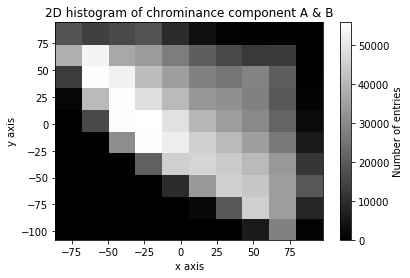

In [5]:
#Using hist2d with component a and B
plt.hist2d(A.ravel(), B.ravel(), bins = 10,  cmap = 'gray')
plt.title('2D histogram of chrominance component A & B')
# Plotting a colorbar with label.
plt.xlabel('x axis')
plt.ylabel('y axis')
cb = plt.colorbar()
cb.set_label('Number of entries')

/Users/rachitrastogi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


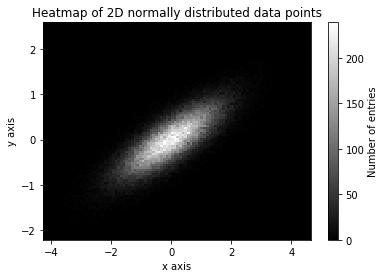

In [6]:
# Heatmap of 2D normally distributed data points
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Define numbers of generated data points and bins per axis.
N_numbers = 100000
N_bins = 100
# set random seed 
np.random.seed(0)
# Generate 2D normally distributed numbers.
x, y = np.random.multivariate_normal(
        mean = [0.0, 0.0],  
        cov =  [[1.0, 0.4],
               [0.4, 0.25]],
        size = N_numbers
        ).T                 
# Constructing 2D histogram from data using the 'gray' colormap
plt.hist2d(x, y, bins = N_bins, normed = False, cmap = 'gray')
# Plotting a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')
# Add title and labels to plot.
plt.title('Heatmap of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

# 1 e) Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target image.

-- The method of telling how good a pixels of a particular image "fit" the pixels distribution of histogram model is known as Back Projection. 
-- In this approach we need to initially calculate the "histogram model" of a feature and then using the same, find the "feature" in the image. 
-- I have used the function called "calcBackProject", here the chosen "channel" results are gathered of the selected image and which then find the corelated histograms bins.
-- ROI(Region of interest): is the set/group/cluster of image that is selected from the entire image. 
-- I have used "getStructuringElement"- which returns an organized image of certain size for morphological functioning followed by filtering.

"Reference: https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/back_projection/back_projection.html, https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html, https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc, https://www.programcreek.com/python/example/89373/cv2.filter2D, https://www.programcreek.com/python/example/89381/cv2.getStructuringElement"

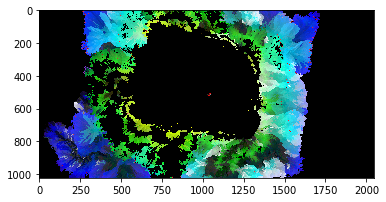

In [7]:
import numpy as np
# Histogram calculation
pic_lab = np.float32(lab)
images = [pic_lab]
channels = [1, 2]
mask = None
histSize = [256,256]
ranges = [
    -128.0, 127.0,
    -128.0, 127.0
]
hist = cv2.calcHist(images, channels, mask, histSize, ranges)
# Reading ROI image
from skimage import io, color
roi = cv2.imread("Region_of_interest.png")
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
pic_lab_1 = color.rgb2lab(roi)
# Histogram calculation of ROI 
pic_lab_2 = np.float32(pic_lab_1)
images = [pic_lab_2]
channels = [1, 2]
mask = None
histSize = [256,256]
ranges = [
    -128.0, 127.0,
    -128.0, 127.0
]
histogram_roi_image = cv2.calcHist(images, channels, mask, histSize, ranges)
#Reading back the image from 1a.
img = cv2.imread('image_2.png')
image_copy = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
new_image = np.float32(image_copy)
mask = cv2.calcBackProject([pic_lab], [1, 2], histogram_roi_image, [-128.0, 127.0,-128.0, 127.0], 1) 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 30, 255, cv2.THRESH_BINARY)
mask = cv2.merge((mask, mask, mask))
final_image = cv2.bitwise_and(new_image, mask)
#Plotting the image
plt.imshow(final_image/255)
plt.show()

# 1 f) Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast. 

-- This is a technique where in the contrast of the image is being enhanced. The "pixcel values" are magnified, and the same is done for the entire image.

"References: https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html, https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image, https://en.wikipedia.org/wiki/Histogram_equalization )"

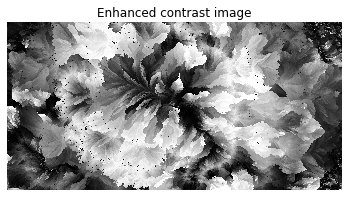

In [8]:
# 1D histogram equalization
# Extracting the image
img = np.uint8(cv2.normalize(L, None, 0, 100, cv2.NORM_MINMAX))
enhanced_con_img = cv2.equalizeHist(img)
# Plotting the image 
plt.axis("off")
plt.title("Enhanced contrast image")
plt.imshow(enhanced_con_img, cmap = 'gray')
plt.show()

# 1 g) Evaluate the performance of these techniques with histograms

-- Histogram back projection was suggested by "Michael J. Swain, Dana H. Ballard". This is a technique that is used to address the question "Where are the colors in the image that belong to the object being looked for i.e. the target image?". This is an added features to 2D-Histogram and marks the "localization" problem. 
-- One of the advantages of back projection is that it decreases "miss tracking" if an artile set foot in alike colored space in "video observation".
-- Histogram Back projection is added with "camshift algorithm".

-- Histogram equalization is a process to increase the contrast of an image thus helping in enhancement. It gives a a cut above image.
-- If Histogram equalization function is familiar then histogram can be recovered. 
-- It gives best output with "cumulative distributive equalization".


"References: https://en.wikipedia.org/wiki/Histogram_equalization,https://theailearner.com/2019/04/18/histogram-backprojection/"

# 2 a) Compute the mean image and principal components for a set of images (e.g. use the training images of ‘5’ in the mnist dataset). Display the mean image and the first 2 principal components (associated with the highest eigenvalues).

-- PCA is an algorithm that is used draw out the critical characteristic of a dataset. 
-- Our data can have a lot of variation and PCA helps us observe the path in which the data variation is the most. The "principal components" of set of data is the eigenvectors. 
-- I have first used the MNIST dataset and look the first 500 values of the digit '4'.
-- The same is being saved at the local machine (as column vectors) then followed by removing the labels. The mean is then calculated and stored.The final dataset is achieved after substring the original withe the mean. 
-- Covariance matrix is used to calculate the SVD to get the Eigen values.
-- The first result in the Eigen is used and displayed as the "First Principal component" followed by the second as the "Second Principal component"

"References: https://en.wikipedia.org/wiki/Principal_component_analysis, https://wellecks.wordpress.com/tag/eigenfaces/, https://rpubs.com/sandipan/191975"

True

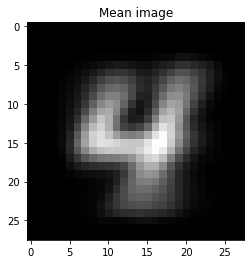

In [9]:
#MNIST data for digit '4'
from numpy import genfromtxt
dataset = genfromtxt('Dataset_MNIST.csv', delimiter=',')
#Removing the lable
dmean = dataset[:,1:]
#Collecting mean 
nmean = np.mean(dmean, 0)
nmean_reshape = nmean.reshape(28,28)
#Subsracting the test image
dfinal = dmean - nmean
#Singular Value Decomposition
U, S, V = np.linalg.svd(dfinal.transpose(), full_matrices = False)
#Eigen digits
eigen_d = U.T
#Plotting image
plt.title("Mean image")
plt.imshow(nmean_reshape, cmap = 'gray')
#Saving the Mean image
filename = 'Mean_image.png'
cv2.imwrite("image_mean.png", nmean_reshape)

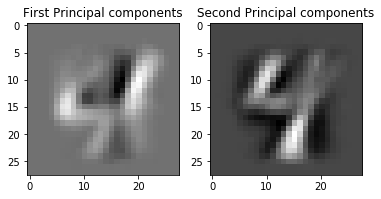

In [10]:
# Principe components
f = plt.figure()
f.add_subplot(1, 2, 1)
pcomponeent_first = eigen_d[1].reshape(28,28)
plt.title("First Principal components")
plt.imshow(pcomponeent_first, cmap = 'gray')

f.add_subplot(1, 2, 2)
pcomponeent_second = eigen_d[2].reshape(28,28)
plt.title("Second Principal components")
plt.imshow(pcomponeent_second, cmap = 'gray')

# 2 b) Compute and display the reconstructions of a test image using the mean image and with p principal components associated with the p highest eigenvalues with p=10 and p=50.

-- In this I have displayed the Principal Component with p = 10, 50 and 450. As the value of p increase the image becomes much more sharper.

"Reference: https://www.programcreek.com/python/example/5434/numpy.diag"

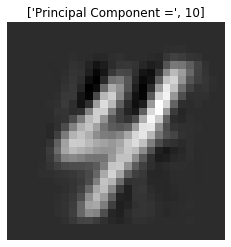

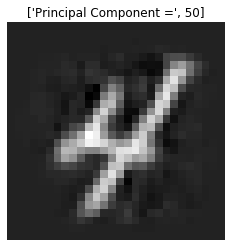

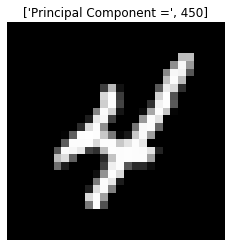

In [12]:
#Displing the Reconstructions 
w = np.dot(dfinal, U)
p = 10
rimage = nmean + np.dot(w[1, 0:p], U[:, 0:p].T)
image_reconstruct = rimage.reshape(28,28)
plt.imshow(image_reconstruct, cmap = 'gray')
plt.axis('off')
plt.title(["Principal Component =",p])   
plt.show()
p = 50
rimage = nmean + np.dot(w[1, 0:p], U[:, 0:p].T)
image_reconstruct = rimage.reshape(28,28)
plt.imshow(image_reconstruct, cmap= 'gray')
plt.axis('off')
plt.title(["Principal Component =",p])   
plt.show()
p = 450
rimage = nmean + np.dot(w[1, 0:p], U[:, 0:p].T)
image_reconstruct = rimage.reshape(28,28)
plt.imshow(image_reconstruct, cmap= 'gray')
plt.axis('off')
plt.title(["Principal Component =",p])   
plt.show()
#cv2.imwrite("image_eigen50.png", recon)

# 2 c) Compute and display a DFFS (distance-from feature-space) and SSD (sum-of-square-differences) heat maps for detection using your PCA representation of a MNIST number. For the test image, use a composite image made of MNIST test images. 

-- A test image is being taken and read for this task. Then the Mean image that I got as result of question 2a is used for matching template.  The result is displayed us gray image. 
-- "cv2.matchTemplate" is used for this purpose. 

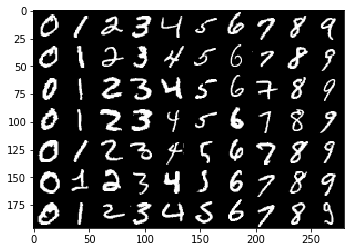

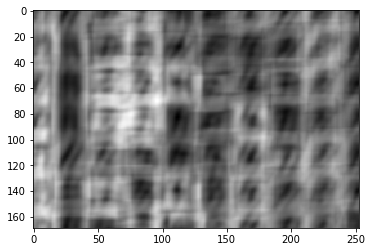

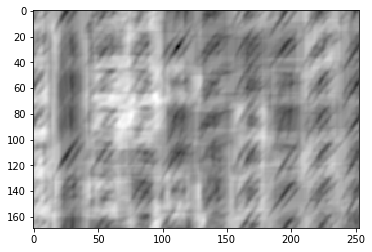

In [13]:
import cv2
cimage = cv2.imread('rachit_composite_test.png',0)
plt.imshow(cimage, cmap = 'gray')
plt.show()

image_mean= cv2.imread('image_mean.png',0)
result = cv2.matchTemplate(cimage,image_mean,cv2.TM_SQDIFF)
plt.imshow(result, cmap = 'gray')
plt.show()

image_eigen50= cv2.imread('image_eigen50.png',0)
result_eigen = cv2.matchTemplate(cimage,image_eigen50,cv2.TM_SQDIFF)
plt.imshow(result_eigen, cmap = 'gray')
plt.show()

# 1 d) Evaluate the performance of SSD and DFFS

-- SSD which is know as Sum of Square Difference
-- SSD decection rate is less.
-- SSD are much more systematic.

-- DFFS which is know as "Distance-from-feature-space" is used to successfully perceive "features".
-- Have high detection rate.

"Referenc: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=323814"